In [178]:
%load_ext autoreload
%autoreload 2
import data_manipulation
import pickle
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
from skimage.exposure import adjust_sigmoid
from skimage import feature
from skimage.color import rgb2gray
from shapely.geometry import Polygon
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
import bb_predict
import overlap

In [180]:
import keras
from keras.models import load_model

In [181]:
model = load_model("edges-weights-improvement-11-3.47.hdf5')

SyntaxError: EOL while scanning string literal (<ipython-input-181-b53b611964cf>, line 1)

In [5]:
data_manipulation.datset_split()

AttributeError: module 'data_manipulation' has no attribute 'datset_split'

In [115]:
with open("data/dataset_val.obj", "rb") as f:
    train = pickle.load(f)

# Healthy Lung

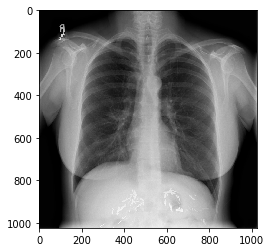

In [116]:
mask, class_ids = train.load_mask(0)
image = train.load_image(0)
plt.imshow(image)
plt.show()

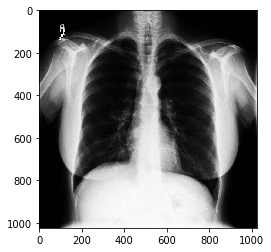

In [117]:
threshold_image = adjust_sigmoid(image)
plt.imshow(threshold_image)
plt.show()

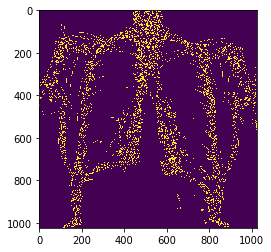

In [118]:
edge_detected = feature.canny(rgb2gray(threshold_image), sigma = 0.5)
plt.imshow(edge_detected)
plt.show()

# Lung Opacity

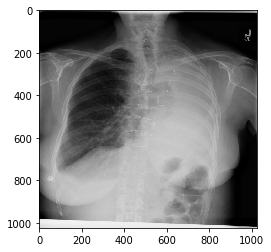

In [169]:
# 0 - 24183
image_id = 1002
mask, class_ids = train.load_mask(image_id)
image = train.load_image(image_id)
plt.imshow(image)
plt.show()

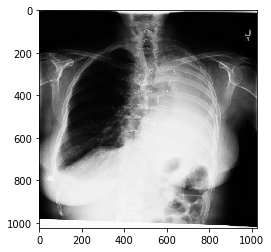

In [170]:
threshold_image = adjust_sigmoid(image)
plt.imshow(threshold_image)
plt.show()

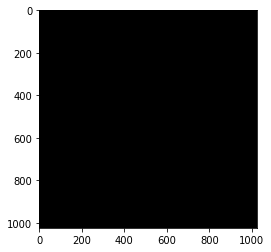

In [171]:
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')

In [172]:
copy_image = np.copy(image)
masked = 1 - masked
for i in range(3):
    copy_image[:,:,i] = image[:,:,i] * masked

In [173]:
x = np.random.normal(0, 1, [1,1024,1024,3])
c = model.predict(x)

In [174]:
c = model.predict(threshold_image.reshape((1,1024,1024,3)))

In [175]:
print(c)

[[0.71843237 0.28156763]]


In [73]:
print(local.shape)

(1, 1024, 1024)


In [53]:
print(np.max(local))
if np.max(local):
    mult = 255 / np.max(local)
else:
    mult = np.max(local)
print(mult)

0.00091018836
280161.7890483143


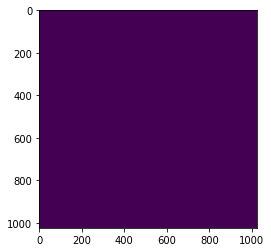

In [54]:
plt.imshow(local[0]*mult)

4886
32.0
32.0
32.0
32.0
32.0
32.0
[[352.0, 192.0, 96.0, 160.0, 36.8], [352.0, 192.0, 96.0, 224.0, 36.76190476190476], [352.0, 128.0, 96.0, 160.0, 36.733333333333334]]


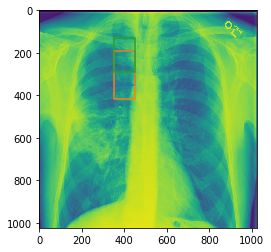

In [10]:
plt.imshow(image[:,:,1])
output = bb_predict.predict_bb(32, 32, image[:,:,1], 0.7, 0.5)
for box in output:
    poly = Polygon([(box[0], box[1]), (box[0] + box[2], box[1]), (box[0] + box[2], box[1] + box[3]), (box[0], box[1] + box[3])])
    x,y = poly.exterior.xy
    plt.plot(x,y)
print(output)

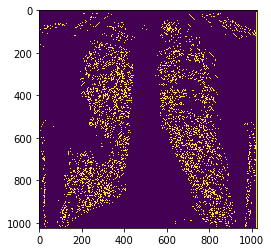

In [11]:
edge_detected = feature.canny(rgb2gray(threshold_image), sigma = 0.6)
plt.imshow(edge_detected)
plt.show()

In [156]:
import time

In [157]:
def prior():
    ids = range(train.size())
    sample = random.sample(ids, 20)
    cnt_box = np.zeros([1024,1024,1])

    p_imgs = [] #build up list of masks (numpy array) of images with pneumonia
    hasPneu = 0
    for id in sample[:]:
        mask, class_ids = train.load_mask(id) #mask = numpy array of boolean values. 1 if pneumonia in that pixel
                   #class_ids = 1 elt array. 1 if image has pneumonia. 0 otherwise
        if (class_ids.all()):
            hasPneu += 1
            #np.sum
            cnt_box = cnt_box + np.sum(mask.astype(int), axis = 2)
    print(cnt_box.shape)
    x = np.max(cnt_box)
    return hasPneu, x, cnt_box

In [158]:
start = time.time()
prior()
end = time.time()
print(end - start)

(1024, 1024, 1024)
59.8297438621521


In [9]:
IMAGE_DIM = 1024

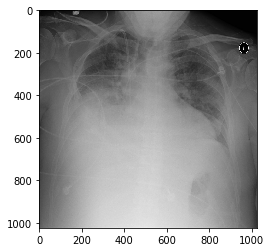

In [59]:
image = train.load_image(5)
plt.imshow(image)

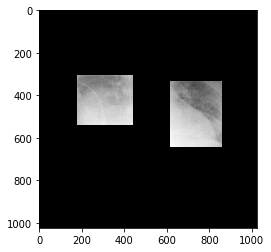

In [79]:
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')

In [52]:
mask, class_ids = train.load_mask(5)
plt.show(mask.any())